In [39]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\Ciara Woellhof\AppData\Local\Programs\Microsoft VS Code`


In [40]:
Pkg.add(["Plots", "Optimization", "ForwardDiff", "OptimizationOptimJL"])
Pkg.add("Optim")
using Optim
using Plots
using Optimization
using ForwardDiff
using OptimizationOptimJL

   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\AppData\Local\Programs\Microsoft VS Code\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\AppData\Local\Programs\Microsoft VS Code\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\AppData\Local\Programs\Microsoft VS Code\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\AppData\Local\Programs\Microsoft VS Code\Manifest.toml`


In [41]:
function funquad(x,p)
    return x[1]^2+3*x[2]^2
end

funquad (generic function with 2 methods)

In [42]:
path = []

function callback_fun(result,value)
    push!(path,copy(result.u))
    return false # indicating when to early terminate
end

callback_fun (generic function with 1 method)

In [43]:
#Guess

x_0 = [3.0,2.0]

2-element Vector{Float64}:
 3.0
 2.0

In [44]:
# wrap
wr = OptimizationFunction(funquad, AutoForwardDiff())
# Make problem
prob = OptimizationProblem(wr,x_0)
# solve using graddesc
answer = solve(prob, GradientDescent(), callback = callback_fun)

OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 3.0
 2.0

In [47]:
x_follow = [a[1] for a in path]
y_follow = [a[2] for a in path]

steps = 0.5

xis = collect(-6:steps:6)
yis = collect(-6:steps:6)

0.5

In [49]:

zis = [funquad([x,y]) for x in xis, y in yis]

25×25 Matrix{Float64}:
 144.0   126.75  111.0   96.75  84.0   …  96.75  111.0   126.75  144.0
 138.25  121.0   105.25  91.0   78.25     91.0   105.25  121.0   138.25
 133.0   115.75  100.0   85.75  73.0      85.75  100.0   115.75  133.0
 128.25  111.0    95.25  81.0   68.25     81.0    95.25  111.0   128.25
 124.0   106.75   91.0   76.75  64.0      76.75   91.0   106.75  124.0
 120.25  103.0    87.25  73.0   60.25  …  73.0    87.25  103.0   120.25
 117.0    99.75   84.0   69.75  57.0      69.75   84.0    99.75  117.0
 114.25   97.0    81.25  67.0   54.25     67.0    81.25   97.0   114.25
 112.0    94.75   79.0   64.75  52.0      64.75   79.0    94.75  112.0
 110.25   93.0    77.25  63.0   50.25     63.0    77.25   93.0   110.25
 109.0    91.75   76.0   61.75  49.0   …  61.75   76.0    91.75  109.0
 108.25   91.0    75.25  61.0   48.25     61.0    75.25   91.0   108.25
 108.0    90.75   75.0   60.75  48.0      60.75   75.0    90.75  108.0
 108.25   91.0    75.25  61.0   48.25     61.0  

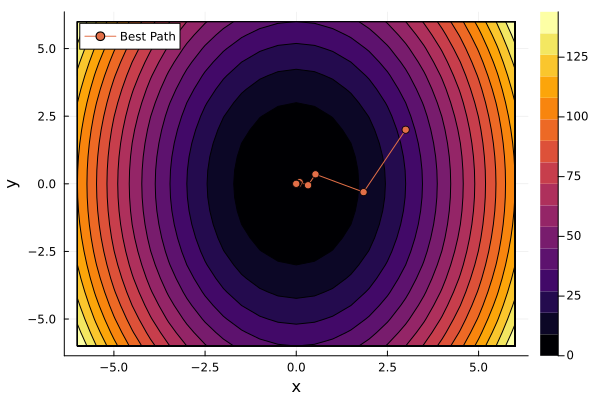

In [50]:
# method from class to plot contour 

contourf(xis,yis,zis, xlabel = "x",ylabel = "y",zlabel = "OG")
plot!(x_follow,y_follow, markershape=:circle, aspect=:equal,label = "Best Path")
